# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [3]:
## Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, beta
pd.options.mode.chained_assignment = None

In [4]:
# read in the orders.csv file
orders = pd.read_csv("orders.csv")
# sort by created_at and assign new table to orders_sorted
orders["created_at"] = pd.to_datetime(orders["created_at"])
orders_sorted = orders.sort_values(by = "created_at")
orders_sorted.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 00:08:09
1741,1742,39,910,268,2,cash,2017-03-01 00:10:19
3228,3229,97,912,324,2,cash,2017-03-01 00:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 00:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 00:22:25


In [7]:
orders.describe()
# From this command, we can see that the average order value across all the transactions is $3145.13. This value seems unreasonably high.
naive_mean = orders["order_value"].sum() / len(orders["order_value"])
print(f"Naive mean calculated: {naive_mean}")
# Looking at the total_items across orders, there are many orders in which >= 2 items are bought.
avg_num_items = orders["total_items"].sum() / len(orders["total_items"])
print(f"Average amount of items bought: {avg_num_items}")
# Thus in code below, we will calculate a new metric called Average Item Value which will more accurately calculate mean of shoe cost.

Naive mean calculated: 3145.128
Average amount of items bought: 8.7872


Text(0.5, 1.0, 'Number of Items Bought vs Order Value')

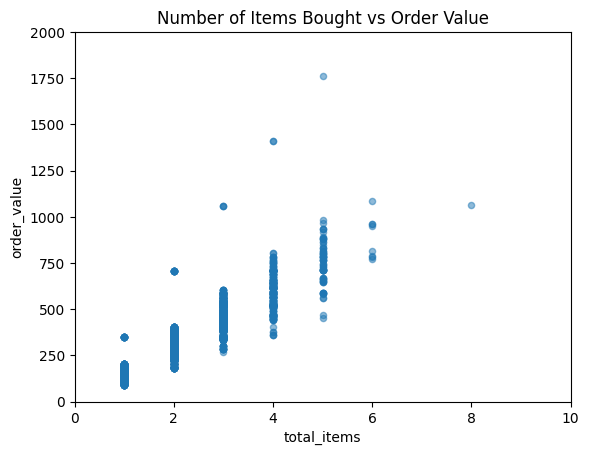

In [25]:
orders.plot.scatter(x = "total_items", y = "order_value", alpha = 0.5)
plt.xlim(0, 10)
plt.ylim(0, 2000)
plt.title("Number of Items Bought vs Order Value")
# In the below scatterplot, while I have cut the borders of the graph, ignoring some of the great outliers, for the vast majority of the data,
# the more items a person has bought, the greater the order value tends to be.

In [10]:
# Let's try to calculate the AOV over a 30 day window, specifically the first 30 days of business.
start_date = pd.to_datetime("2017-03-01")
end_date = pd.to_datetime("2017-03-30")
orders_filtered = orders_sorted[(orders_sorted['created_at'] >= start_date) & (orders_sorted['created_at'] <= end_date)]
print("The average order value of a sneaker over 30 days is: " + str(orders_sorted['order_value'].sum() / orders_sorted['total_items'].sum()))

The average order value of a sneaker over 30 days is: 357.92152221412965


In [11]:
# Let's make a new column called AIV which measures the average item value
orders_sorted["AIV"] = orders_sorted["order_value"] / orders_sorted["total_items"]
orders_filtered["AIV"] = orders_filtered["order_value"] / orders_filtered["total_items"]
orders_sorted.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,AIV
1862,1863,39,738,536,4,cash,2017-03-01 00:08:09,134.0
1741,1742,39,910,268,2,cash,2017-03-01 00:10:19,134.0
3228,3229,97,912,324,2,cash,2017-03-01 00:14:12,162.0
1267,1268,80,798,290,2,credit_card,2017-03-01 00:19:31,145.0
2689,2690,49,799,258,2,credit_card,2017-03-01 00:22:25,129.0


Average Order Value Median: 153.0


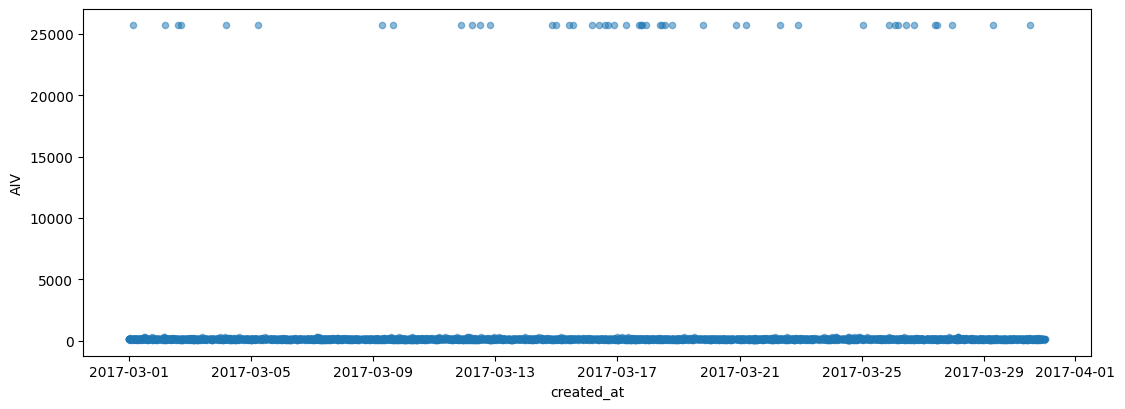

In [12]:
# Now let's plot this new AIV value over time to see how trends spiral upwards
orders_sorted.plot.scatter(x = "created_at", y = "AIV", alpha = 0.5)
figure = plt.gcf()
figure.set_size_inches(13, 4.5)
# Given the amount of outliers in this sample, lets use median as a mesaure of central tendency.
# Calculate median of AOV over 30 days and this measurement will be used later in the conclusion statement.
AIV_median = np.median(orders_filtered["AIV"])
print(f"Average Order Value Median: {AIV_median}")

As we can see from the scatterplot of all average order values across the span of the transactions in the sneaker stores, the vast majority of them fall far below 5000 dollars per item, which makes sense since sneakers are a relatively affordable item. However, there are a significant amount of outliers which have an AIV value of over $25,000. This is incredibly high, so much so that even involving 2 or 3 of these outliers in the calculation of the AIV over 30 days can have a great impact on the mean, meaning that this distribution of sneaker prices is most likely skewed to the right. Below will be a curve distribution which shows this trend.

Skewness factor: 0.3816515082745188


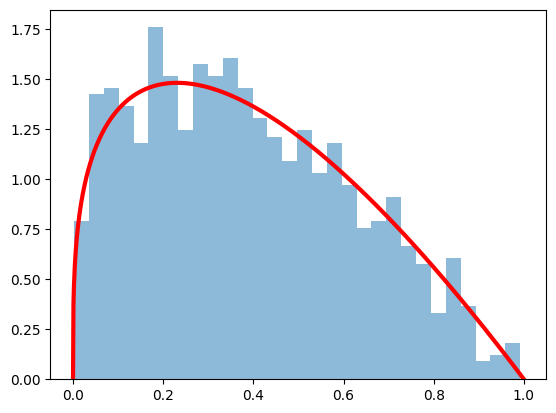

In [31]:
# Let's create a beta distribution with parameters a = 1, b = 3 as a reference to compare skewness with the final data
alpha = 1.3
beta_param = 2
beta_distribution = beta(alpha, beta_param)
random_samples = beta_distribution.rvs(size = 1000)
x = np.linspace(0, 1, 1000)
plt.plot(x, beta_distribution.pdf(x), 'r-', lw = 3, label = "Beta(1, 3) Distribution")
plt.hist(random_samples, density=True, alpha=0.5, bins=30, label='Random Samples')
# calculate skewness
skewness = skew(random_samples)
print(f"Skewness factor: {skewness}")

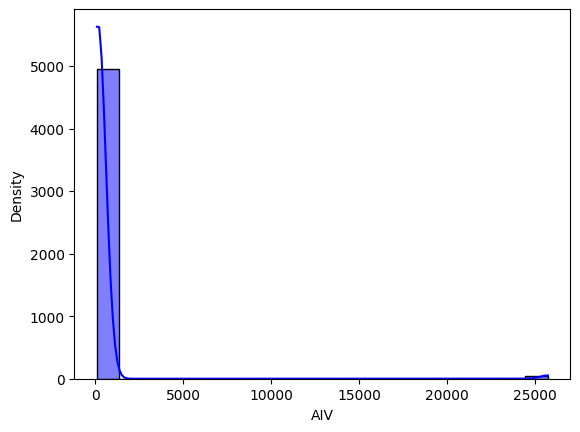

Skewness factor: 10.278745052630452
46
4954


In [13]:
# Now let's plot a curved distribution to see if the mean is skewed to the right, affecting the AOV.
sns.histplot(orders_sorted["AIV"], kde = True, bins = 20, color = 'blue', edgecolor = 'black')
plt.xlabel('AIV')
plt.ylabel('Density')
plt.show()
# calculate skewness
skewness = skew(orders_sorted["AIV"])
print(f"Skewness factor: {skewness}")
# In addition, lets also see the amount of transactions whose AIV is below 3000 and above 25000 to show that there is a significant amount of outliers
print(len(orders_sorted[orders_sorted["AIV"] > 25000]))
print(len(orders_sorted[orders_sorted["AIV"] < 3000]))

There were two issues with the initial analysis: 
1. Not accounting for multiple items being bought in the same order
2. The heavy outliers can affect central tendency when using mean as the metric

When looking at the orders that have multiple items being bought in the same order, we can see from the above analysis that there is an overall positive correlation with the number of items bought in the order and the overall order value. Thus, we have to create a new metric called average item value to account for this factor, to get the true value of each item.

As we can see from the above plot, the distribution of Average Item Value across all customers is heavily skewed to the right with a skew factor of > 10. This indicates that using mean as a central measure of customer behavior is not the most effective way of summarizing the average order value of a sneaker.

Rather, using median as a central measure will give a better measure on the customer's behavior when purchasing sneakers at the retailing website. Using the median will account for larger outliers, regardless of magnitude, to give the middle value which better represents the vast majority of consumers, whereas using the mean shown in the prompt would include these great outliers, heavily influencing the measurements of central tendency.

Additionally, using mode may also work as a measure of central tendency since it also does not care about the magnitude of data points but rather their frequency. However, in certain timelines where more customers are purchasing more expensive products, this measure may sometimes give answers that reflect only those exclusive payments. Therefore, median is the overall best measure of central tendency in this situation.

The mean of the Average Order Value over 30 days is: $3145.13

The mean of Average Item Value over 30 days is: $357.92

The median of the Average Item Value over 30 days is: $153